In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train_ctrUa4K.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
ct = pd.crosstab(data.Dependents, data.Property_Area)
ct

Property_Area,Rural,Semiurban,Urban
Dependents,,,
0,109,130,106
1,21,40,41
2,29,37,35
3+,18,20,13


In [15]:
ct.sum(1) #These are indexes

Dependents
0     345
1     102
2     101
3+     51
dtype: int64

In [16]:
ct.sum() #These are columns

Property_Area
Rural        177
Semiurban    227
Urban        195
dtype: int64

In [37]:
ct2 = pd.crosstab(data.Dependents, data.Property_Area, margins=True, margins_name="Total", values=data.LoanAmount, aggfunc='mean')
ct2

Property_Area,Rural,Semiurban,Urban,Total
Dependents,,,,
0,142.654206,133.921875,131.111111,135.886228
1,141.947368,167.210526,158.390244,158.622449
2,173.740741,140.594595,142.029412,150.224490
3+,186.500000,196.650000,187.636364,190.897959
Total,152.099415,146.327354,142.524324,146.816926


In [38]:
data[data.Property_Area == "Semiurban"][data.Dependents == '1']['LoanAmount'].mean()

<ipython-input-38-afa85457cbd4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.Property_Area == "Semiurban"][data.Dependents == '1']['LoanAmount'].mean()


167.21052631578948

In [41]:
ct3 = pd.crosstab(data.Dependents, data.Property_Area, normalize=True, margins=True)
ct3

Property_Area,Rural,Semiurban,Urban,All
Dependents,,,,
0,0.181970,0.217028,0.176962,0.575960
1,0.035058,0.066778,0.068447,0.170284
2,0.048414,0.061770,0.058431,0.168614
3+,0.030050,0.033389,0.021703,0.085142
All,0.295492,0.378965,0.325543,1.000000


In [42]:
ct4 = pd.crosstab(data.Dependents, data.Property_Area, normalize='columns', margins=True)
ct4

Property_Area,Rural,Semiurban,Urban,All
Dependents,,,,
0,0.615819,0.572687,0.543590,0.575960
1,0.118644,0.176211,0.210256,0.170284
2,0.163842,0.162996,0.179487,0.168614
3+,0.101695,0.088106,0.066667,0.085142


In [46]:
ct4 = pd.crosstab(data.Dependents, data.Property_Area, normalize='index', margins=True)
ct4

Property_Area,Rural,Semiurban,Urban
Dependents,,,
0,0.315942,0.376812,0.307246
1,0.205882,0.392157,0.401961
2,0.287129,0.366337,0.346535
3+,0.352941,0.392157,0.254902
All,0.295492,0.378965,0.325543


In [47]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [49]:
x = pd.crosstab(data.Dependents, [data.Property_Area, data.Married])
x

Property_Area Rural     Semiurban     Urban    
Married          No Yes        No Yes    No Yes
Dependents                                     
0                53  56        62  68    56  50
1                 3  18        12  28     8  33
2                 4  25         3  34     1  34
3+                3  15         2  18     2  11

In [51]:
x.sum(1)

Dependents
0     345
1     102
2     101
3+     51
dtype: int64

In [57]:
xx = pd.crosstab([data.Dependents, data.Loan_Status], [data.Property_Area, data.Married], rownames=['row1', 'ro2'], colnames=['col1', 'col2'], dropna=False)

xx

col1     Rural     Semiurban     Urban    
col2        No Yes        No Yes    No Yes
row1 ro2                                  
0    N      20  21        18   9    23  16
     Y      33  35        44  59    33  34
1    N       2  10         5   6     3  10
     Y       1   8         7  22     5  23
2    N       2   8         0   6     1   8
     Y       2  17         3  28     0  26
3+   N       1   4         0   8     2   3
     Y       2  11         2  10     0   8

<AxesSubplot:xlabel='col1-col2', ylabel='row1-ro2'>

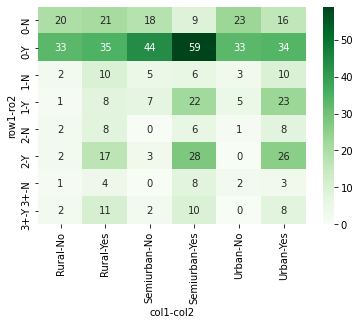

In [68]:
#visualization

sns.heatmap(xx, annot=True, cmap="Greens")